In [1]:
import numpy as np
import pandas as pd
from datetime import datetime
import os
import logging
import matplotlib.pyplot as plt

c:\Users\mt01034\Anaconda3\envs\tf-env\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\mt01034\Anaconda3\envs\tf-env\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
c:\Users\mt01034\Anaconda3\envs\tf-env\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  stacklevel=1)


In [2]:
import numpy as np
import pandas as pd
from datetime import datetime
import os
import logging
import matplotlib.pyplot as plt

In [3]:
# set the seeds so that we get the same initialization across different trials
seed_random = 1989

In [4]:

log_time = datetime.now().strftime("%d-%m-%Y_%H%M%S")


logging.basicConfig(filename='train_predictive_models_Masking.log',
                        format='%(asctime)s - %(message)s',
                        level=logging.INFO)
logging.info("Starting the experiemnt...")

antibitics_abx_list = ['NIT', 'SXT', 'CIP', 'LVX']
features_path ='../Data/all_uti_features.csv'
label_path='../Data/all_uti_resist_labels.csv'


In [5]:
# Load in data 
feature_df = pd.read_csv(features_path)
label_df = pd.read_csv(label_path)

In [6]:
feature_df.drop('example_id', inplace=True, axis=1)
feature_df

,demographics - age,demographics - is_white,demographics - is_veteran,micro - prev resistance LVX 14,micro - prev resistance AMP 14,micro - prev resistance CFZ 14,micro - prev resistance NIT 14,micro - prev resistance GEN 14,micro - prev resistance SXT 14,micro - prev resistance TET 14,...,selected micro - colonization pressure NIT 90 - overall,selected micro - colonization pressure OXA 90 - overall,selected micro - colonization pressure PEN 90 - overall,selected micro - colonization pressure SAM 90 - overall,selected micro - colonization pressure SXT 90 - overall,selected micro - colonization pressure TET 90 - overall,selected micro - colonization pressure TZP 90 - overall,selected micro - colonization pressure VAN 90 - overall,is_train,uncomplicated
0,54,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.24,0.56,0.49,0.38,0.26,0.37,0.06,0.13,0,0
1,27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.19,0.78,0.83,0.33,0.20,0.35,0.18,0.13,1,0
2,89,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.21,0.66,0.51,0.50,0.25,0.37,0.05,0.12,1,0
3,49,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.23,0.47,0.50,0.25,0.26,0.35,0.06,0.12,1,0
4,21,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.24,0.50,0.49,0.33,0.25,0.37,0.05,0.10,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116897,66,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.24,0.49,0.54,0.33,0.25,0.35,0.09,0.10,1,0
116898,74,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.21,0.49,0.50,0.30,0.25,0.34,0.06,0.09,1,0
116899,48,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.21,0.51,0.51,0.28,0.23,0.34,0.05,0.10,1,1
116900,63,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.18,0.52,0.57,0.38,0.27,0.35,0.06,0.12,0,0


In [7]:
label_df.drop('example_id', inplace=True, axis=1)
label_df

,NIT,SXT,CIP,LVX,is_train,uncomplicated
0,0.0,0.0,0.0,0.0,0,0
1,0.0,0.0,0.0,0.0,1,0
2,0.0,0.0,1.0,1.0,1,0
3,0.0,0.0,0.0,0.0,1,0
4,0.0,0.0,0.0,0.0,1,1
...,...,...,...,...,...,...
116897,1.0,1.0,1.0,1.0,1,0
116898,NaN,NaN,0.0,0.0,1,0
116899,0.0,0.0,0.0,0.0,1,1
116900,0.0,0.0,0.0,0.0,0,0


In [8]:
feature_list=list(feature_df.columns)
feature_list

['demographics - age',
 'demographics - is_white',
 'demographics - is_veteran',
 'micro - prev resistance LVX 14',
 'micro - prev resistance AMP 14',
 'micro - prev resistance CFZ 14',
 'micro - prev resistance NIT 14',
 'micro - prev resistance GEN 14',
 'micro - prev resistance SXT 14',
 'micro - prev resistance TET 14',
 'micro - prev resistance AMC 14',
 'micro - prev resistance CIP 14',
 'micro - prev resistance SAM 14',
 'micro - prev resistance ERY 30',
 'micro - prev resistance OXA 30',
 'micro - prev resistance QUD 30',
 'micro - prev resistance RIF 30',
 'micro - prev resistance AMP 30',
 'micro - prev resistance CFZ 30',
 'micro - prev resistance PEN 30',
 'micro - prev resistance LVX 30',
 'micro - prev resistance CLI 30',
 'micro - prev resistance DOX 30',
 'micro - prev resistance NIT 30',
 'micro - prev resistance TET 30',
 'micro - prev resistance CIP 30',
 'micro - prev resistance CRO 30',
 'micro - prev resistance GEN 30',
 'micro - prev resistance SXT 30',
 'micro -

In [9]:
result = []
for col in feature_list:
    if ( '7' in col or '14' in col or '30' in col or '90' in col or '180' in col):
       result.append(col)
    #elif('7' in col):
        #print (col)
    #elif('medi' in col ):
    #    print (col)
result

['micro - prev resistance LVX 14',
 'micro - prev resistance AMP 14',
 'micro - prev resistance CFZ 14',
 'micro - prev resistance NIT 14',
 'micro - prev resistance GEN 14',
 'micro - prev resistance SXT 14',
 'micro - prev resistance TET 14',
 'micro - prev resistance AMC 14',
 'micro - prev resistance CIP 14',
 'micro - prev resistance SAM 14',
 'micro - prev resistance ERY 30',
 'micro - prev resistance OXA 30',
 'micro - prev resistance QUD 30',
 'micro - prev resistance RIF 30',
 'micro - prev resistance AMP 30',
 'micro - prev resistance CFZ 30',
 'micro - prev resistance PEN 30',
 'micro - prev resistance LVX 30',
 'micro - prev resistance CLI 30',
 'micro - prev resistance DOX 30',
 'micro - prev resistance NIT 30',
 'micro - prev resistance TET 30',
 'micro - prev resistance CIP 30',
 'micro - prev resistance CRO 30',
 'micro - prev resistance GEN 30',
 'micro - prev resistance SXT 30',
 'micro - prev resistance AMC 30',
 'micro - prev resistance ATM 30',
 'micro - prev resis

In [10]:
Droped_feature_list=list(set(feature_list)-set(result))
Droped_feature_list.remove('is_train')
len(Droped_feature_list)

127

In [11]:
dropped_features=feature_df.drop(result, axis=1)

In [12]:
len(result), dropped_features.shape

(662, (116902, 128))

In [13]:
import random
os.environ['PYTHONHASHSEED'] = str(seed_random)
random.seed(seed_random)

In [14]:
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
#kfold = KFold(n_splits=10, shuffle=True, random_state=1989)

In [15]:
from tensorflow.keras.layers import *
from numpy import dstack
from tensorflow.keras.utils import to_categorical

import tensorflow as tf
tf.random.set_seed(seed_random)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Conv1D, Flatten, Dropout, MaxPooling1D
from tensorflow.keras.callbacks import EarlyStopping

In [16]:
tf.config.run_functions_eagerly(True)
#tf.enable_eager_execution()
from tensorflow.keras import layers
from tensorflow.keras import Input
from tensorflow.keras import optimizers
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dropout, Flatten, Conv1D

from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras import backend as K
import uuid

def add_pos_2(input,nb):
    input_pos_encoding = tf.constant(nb, shape=[input.shape[1]], dtype="int32")/input.shape[1]
    input_pos_encoding = tf.cast(tf.reshape(input_pos_encoding, [1,10]),tf.float32)
    input = tf.add(input ,input_pos_encoding)
    return input

def transformer_encoder(inputs,key_dim,num_heads):
    dropout=0.3
    # Normalization and Attention
    print("transformer_encoder",inputs.shape)
    x = layers.LayerNormalization(epsilon=1e-6)(inputs)
    x = layers.MultiHeadAttention(
        key_dim=key_dim, num_heads=num_heads
    )(x, x)
    x = layers.Dropout(dropout)(x)
    res = x + inputs

    # Feed Forward Part
    x = layers.LayerNormalization(epsilon=1e-6)(res)
    x = layers.Dense(key_dim, activation='softmax')(x)
    return x + res

def stack_block_transformer_spatial(num_transformer_blocks,featurelength,x):
  for _ in range(num_transformer_blocks):
      x = transformer_encoder(x,featurelength,2)
  x = layers.GlobalAveragePooling1D(data_format="channels_first")(x)

  return x


In [17]:
def Tranfomer_Model(train_data_reshaped):
    num_transformer_blocks=1
    n_features = train_data_reshaped.shape[1] #13
    feature_length  = train_data_reshaped.shape[2] #1 
    input=Input(shape=(n_features,feature_length))
    x=input
    x = stack_block_transformer_spatial(num_transformer_blocks,n_features*feature_length, x)
    
    x = Dropout(0.3)(x)
    x = layers.Dense(32, activation='relu')(x)
    x = Dropout(0.3)(x)
    #x = layers.Dense(20, activation='selu')(x)
    #x = Dropout(0.1)(x)
    output = layers.Dense(4, activation='sigmoid')(x)
  
    model = Model(input, output)
    #opt = optimizers.RMSprop(lr=0.001)
    #model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'],experimental_run_tf_function=False)
    #print(model.summary())
    return model

In [18]:
from tensorflow.keras.layers import *

Extract Train and Test set baselabel

In [19]:
train_feature_df=dropped_features.loc[feature_df['is_train'] == 1]
test_feature_df=(dropped_features.loc[feature_df['is_train'] == 0]).loc[dropped_features['uncomplicated'] == 1]
train_label_df=label_df.loc[label_df['is_train'] == 1]
test_label_df=(label_df.loc[label_df['is_train'] == 0]).loc[feature_df['uncomplicated'] == 1]

In [20]:
train_feature_df.drop(['is_train'], inplace=True, axis=1)
test_feature_df.drop(['is_train'], inplace=True, axis=1)

C:\Users\mt01034\AppData\Roaming\Python\Python37\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [21]:
train_feature_df.shape

(80962, 127)

Imputing Missing values with 0

In [22]:
train_feature_df=train_feature_df.fillna(0)
train_label_df[antibitics_abx_list]=train_label_df[antibitics_abx_list].fillna(-1)
test_feature_df=test_feature_df.fillna(0)
test_label_df[antibitics_abx_list]=test_label_df[antibitics_abx_list].fillna(-1)

C:\Users\mt01034\AppData\Roaming\Python\Python37\site-packages\pandas\core\frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


array([[<AxesSubplot:title={'center':'NIT'}>,
        <AxesSubplot:title={'center':'SXT'}>],
       [<AxesSubplot:title={'center':'CIP'}>,
        <AxesSubplot:title={'center':'LVX'}>]], dtype=object)

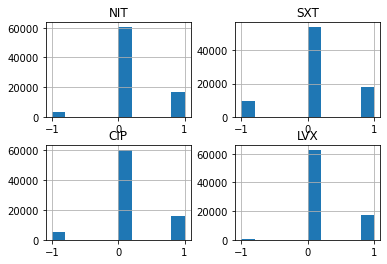

In [23]:
import matplotlib.pyplot as plt
train_label_df[antibitics_abx_list].hist()

In [24]:
import matplotlib.pyplot as plt
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
def plot_metric(history, labels, n,metrics):
  # Use a log scale to show the wide range of values.
  for metric in metrics:
        plt.semilogy(history.epoch, history.history[metric],
                color=colors[n], label='Train '+labels[n])
        plt.semilogy(history.epoch, history.history['val_'+metric],
                color=colors[n], label='Val '+labels[n],
                linestyle="--")
        n=n+1
  plt.xlabel('Epoch')
  plt.ylabel('Metrics')

  plt.legend()
  plt.savefig('output/'+'Plot_Default_Drooped'.join(labels)+'.png')

In [25]:
from tensorflow.keras import backend as K


In [26]:
mask_value=-1
#model_threshold=0.5

In [27]:
def masked_accuracy(y_true, y_pred, model_threshold=0.5):
    dtype = K.floatx()
    total = K.sum(K.cast(K.not_equal(y_true, mask_value), dtype))
    #total=K.cast(len(y_true),dtype)
    #correct = K.sum(K.cast(K.equal(y_true, K.round(y_pred)), dtype))
    correct = K.sum(K.cast(K.greater(K.clip(y_pred, 0, 1), model_threshold), dtype))
    #print(correct,total)
    return correct / total

In [28]:
def masked_loss_function(y_true, y_pred):
    mask = K.cast(K.not_equal(y_true, mask_value), K.floatx())
    #print(mask)
    return K.binary_crossentropy(y_true * mask, y_pred * mask)

In [29]:
def masked_f1(y_true, y_pred, model_threshold=0.5):
    mask = K.cast(K.not_equal(y_true, mask_value), K.floatx())
    dtype = K.floatx()
    def recall_m(y_true, y_pred):
        #TP = K.sum(K.round(K.clip(y_true * y_pred*mask, 0, 1)))
        #Positives = K.sum(K.round(K.clip(y_true*mask, 0, 1)))
        TP=K.sum(K.cast(K.greater(K.clip(y_true * y_pred *mask, 0, 1), model_threshold), dtype) )
        Positives=K.sum(K.cast(K.greater(K.clip(y_true *mask, 0, 1), model_threshold), dtype) )

        recall = TP / (Positives+K.epsilon())    
        return recall 


    def precision_m(y_true, y_pred):
        #TP = K.sum(K.round(K.clip(y_true * y_pred *mask, 0, 1)))
        #Pred_Positives = K.sum(K.round(K.clip(y_pred*mask, 0, 1)))
        TP=K.sum(K.cast(K.greater(K.clip(y_true * y_pred *mask, 0, 1), model_threshold), dtype ))
        Pred_Positives=K.sum(K.cast(K.greater(K.clip(y_pred *mask, 0, 1), model_threshold),dtype))
    
        precision = TP / (Pred_Positives+K.epsilon())
        return precision 

    precision, recall = precision_m(y_true, y_pred), recall_m(y_true, y_pred)

    return 2*((precision*recall)/(precision+recall+K.epsilon()))
  

In [30]:
def masked_precision(y_true, y_pred, model_threshold=0.5):
    dtype = K.floatx()
    mask = K.cast(K.not_equal(y_true, mask_value), K.floatx())
    #TP = K.sum(K.round(K.clip(y_true * y_pred *mask, 0, 1)))
    TP=K.sum(K.cast(K.greater(K.clip(y_true * y_pred *mask, 0, 1), model_threshold), dtype ))
    #Pred_Positives = K.sum(K.round(K.clip(y_pred*mask, 0, 1)))
    Pred_Positives=K.sum(K.cast(K.greater(K.clip(y_pred *mask, 0, 1), model_threshold),dtype))
    precision = TP / (Pred_Positives+K.epsilon())
    return precision 

In [31]:
def masked_recall(y_true, y_pred, model_threshold=0.5):
    dtype = K.floatx()
    mask = K.cast(K.not_equal(y_true, mask_value), K.floatx())
    #TP = K.sum(K.round(K.clip(y_true * y_pred*mask, 0, 1)))
    TP=K.sum(K.cast(K.greater(K.clip(y_true * y_pred *mask, 0, 1), model_threshold), dtype) )
    #Positives = K.sum(K.round(K.clip(y_true*mask, 0, 1)))
    Positives=K.sum(K.cast(K.greater(K.clip(y_true *mask, 0, 1), model_threshold), dtype) )
    
    recall = TP / (Positives+K.epsilon())    
    return recall 

In [32]:
def masked_specificity(y_true, y_pred, model_threshold=0.5):
    dtype = K.floatx()
    mask = K.cast(K.not_equal(y_true, mask_value), K.floatx())
    #TP = K.sum(K.round(K.clip(y_true * y_pred*mask, 0, 1)))
    FP=K.sum(K.cast(K.greater(K.clip((1-y_true) * y_pred *mask, 0, 1), model_threshold),dtype) )
    #Positives = K.sum(K.round(K.clip(y_true*mask, 0, 1)))
    TN=K.sum(K.cast(K.greater(K.clip((1-y_true)*(1-y_pred) *mask, 0, 1), model_threshold),dtype) )
    
    recall = TN / (TN+FP+K.epsilon())    
    return recall 

In [33]:
def masked_AUC(y_true, y_pred):
    mask = K.cast(K.not_equal(y_true, mask_value), K.floatx())
    m = tf.keras.metrics.AUC()
    m.update_state(y_true*mask, y_pred*mask)
    return m.result().numpy()

In [34]:
#thresholds = [0.2,0.3,0.4,0.5,0.6, 0.7,0.8]

METRICS = [
      masked_accuracy,
      masked_precision,
      masked_recall,
      masked_specificity,
      masked_f1,
      masked_AUC
      #[tf.keras.metrics.BinaryAccuracy(name=f'BiAccuracy+{thr}',threshold=thr) for thr in thresholds],
      #[tf.keras.metrics.Precision(name=f'precision+{thr}',thresholds=thr) for thr in thresholds],
      #[tf.keras.metrics.Recall(name=f'recall_+{thr}',thresholds=thr) for thr in thresholds],
      #tf.keras.metrics.AUC(name='auc'),
      #f1
]

In [35]:
EPOCHS = 100
BATCH_SIZE = 32

es = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', 
    verbose=1,
    patience=10,
    mode='min',
    restore_best_weights=True)

In [36]:

from sklearn.metrics import roc_curve
from numpy import sqrt
from numpy import argmax
from matplotlib import pyplot

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
def get_threshold( val_label, val_predict, label_count=4):
    partitions=250
    ThreholdList=[]
    for la in range(label_count):
        Threshold=[]
        sensitivity_val=[]
        specificity_val=[]
        accuracy_val=[]
        Gmean=[]
        f1_val=[]
        Index=[]
        for i in range (5, partitions-5):
            sensi=masked_recall(val_label.values[:, la], val_predict[:, la], i/partitions)
            speci=masked_specificity(val_label.values[:, la], val_predict[:, la], i/partitions)
            Threshold.append(i/partitions)
            accuracy_val.append(masked_accuracy(val_label.values[:, la], val_predict[:, la], i/partitions))
            sensitivity_val.append(sensi)
            Gmean.append(speci*sensi)
            specificity_val.append(speci)
            f1=masked_f1(val_label.values[:, la], val_predict[:, la], i/partitions)
            f1_val.append(f1)
            Index.append(f1+speci*sensi)
        ix = argmax(Index)
        print(Threshold[ix])
        ThreholdList.append(Threshold[ix])
        
        plt.plot(Threshold,accuracy_val, c='r', label = "Accuracy")
        plt.plot(Threshold,sensitivity_val, c='g', label = "Sensitivity")
        plt.plot(Threshold,specificity_val, c='b', label = "Specificity")
        plt.plot(Threshold,f1_val, c='C0', label = "F1 score")
        plt.plot(Threshold,Gmean, c='k', label = "Gmeans")
        plt.plot(Threshold,Index, c='m', label = "Index")
        plt.legend()
        plt.show()
    return ThreholdList


Transformer_1

In [39]:
x_train_tfidf, x_val_tfidf, y_train_tfidf, y_val_tfidf = train_test_split(train_feature_df, train_label_df[antibitics_abx_list], test_size=0.15, random_state=1989)

x_train_tfidf=x_train_tfidf.reset_index(drop=True)
y_train_tfidf=y_train_tfidf.reset_index(drop=True)
x_val_tfidf=x_val_tfidf.reset_index(drop=True)
y_val_tfidf=y_val_tfidf.reset_index(drop=True)
sample_size = x_train_tfidf.values.shape[0] # number of samples in train set
time_steps  = x_train_tfidf.values.shape[1] # number of features in train set
input_dimension = 1               # each feature is represented by 1 number
train_data_reshaped = x_train_tfidf.values.reshape(sample_size,time_steps,input_dimension)
  
sample_size = x_val_tfidf.values.shape[0] # number of samples in train set
time_steps  = x_val_tfidf.values.shape[1] # number of features in train set

x_val_tfidfx_val_reshaped = x_val_tfidf.values.reshape(sample_size,time_steps,input_dimension)

x_test_tfidf=test_feature_df.reset_index(drop=True)
y_test_tfidf =test_label_df[antibitics_abx_list].reset_index(drop=True)
sample_size = x_test_tfidf.values.shape[0] # number of samples in train set
time_steps  = x_test_tfidf.values.shape[1] # number of features in train set
test_data_reshaped =x_test_tfidf.values.reshape(sample_size,time_steps,input_dimension)


In [40]:
model=Tranfomer_Model(train_data_reshaped)
model.compile(loss=masked_loss_function,
            optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
            metrics=METRICS)

transformer_encoder (None, 127, 1)


In [45]:
#!pip install visualkeras
#import visualkeras

transformer_encoder (None, 127, 1)
Epoch 1/100


C:\Users\mt01034\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\data\ops\dataset_ops.py:3704: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable.debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "
C:\Users\mt01034\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\data\ops\dataset_ops.py:3704: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable.debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


2151/2151 [==============================] - ETA: 0s - loss: 0.8124 - masked_accuracy: 0.1260 - masked_precision: 0.2322 - masked_recall: 0.1258 - masked_specificity: 0.8841 - masked_f1: 0.1317 - masked_AUC: 0.5395 - ETA: 57s - loss: 0.9121 - masked_accuracy: 0.1661 - masked_precision: 0.2437 - masked_recall: 0.1652 - masked_specificity: 0.8471 - masked - ETA: 37s - loss: 0.8696 - masked_accuracy: 0.1494 - masked_precision: 0.2414 - masked_recall: 0.1489 - masked_specificity: 0.8624 - - ETA: 33s - loss - ETA: 5s - loss: 0.8195 - masked_accuracy: 0.1290 - masked

C:\Users\mt01034\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\data\ops\dataset_ops.py:3704: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable.debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


2151/2151 [==============================] - 230s 107ms/step - loss: 0.8124 - masked_accuracy: 0.1260 - masked_precision: 0.2322 - masked_recall: 0.1258 - masked_specificity: 0.8841 - masked_f1: 0.1317 - masked_AUC: 0.5395 - val_loss: 0.5084 - val_masked_accuracy: 0.0000e+00 - val_masked_precision: 0.0000e+00 - val_masked_recall: 0.0000e+00 - val_masked_specificity: 1.0000 - val_masked_f1: 0.0000e+00 - val_masked_AUC: 0.5980
Epoch 2/100
2151/2151 [==============================] - 228s 106ms/step - loss: 0.5340 - masked_accuracy: 0.0062 - masked_precision: 0.1049 - masked_recall: 0.0064 - masked_specificity: 0.9944 - masked_f1: 0.0119 - masked_AUC: 0.5527 - val_loss: 0.5029 - val_masked_accuracy: 0.0000e+00 - val_masked_precision: 0.0000e+00 - val_masked_recall: 0.0000e+00 - val_masked_specificity: 1.0000 - val_masked_f1: 0.0000e+00 - val_masked_AUC: 0.6557.0083 - masked_p - ETA: 1:08 - loss: 0.5369 - masked_accuracy: 0.0076 - masked_precision: 0.1260 - masked_recall: 0.0080 - maske - 

C:\Users\mt01034\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\data\ops\dataset_ops.py:3704: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable.debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "
C:\Users\mt01034\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\data\ops\dataset_ops.py:3704: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable.debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


0.168


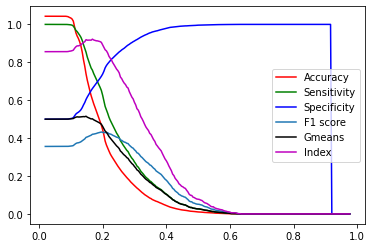

0.2


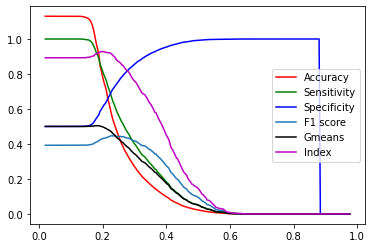

0.2


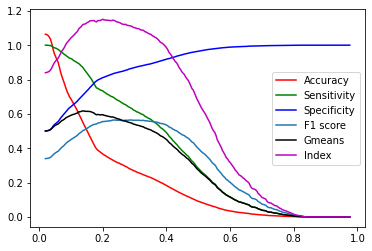

0.216


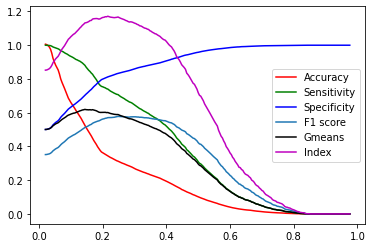

0.15858918
0.2404
0.35125658
0.88095534
0.28544283


In [53]:

    
history = model.fit(train_data_reshaped, y_train_tfidf, epochs=EPOCHS,validation_data=(x_val_reshaped, y_val_tfidf), callbacks=[es], verbose=1)
results = model.evaluate(test_data_reshaped, y_test_tfidf, verbose=0)
model.save('../output/Tranformer_Model_1_UnComplicated_BE_dropped')
        

ypredict = model.predict(x_val_reshaped)
ytrain = model.predict(train_data_reshaped)
Threshold_list=get_threshold(y_val_tfidf, ypredict, label_count=4)
    
ypredictTest = model.predict(test_data_reshaped)
    
print(masked_accuracy(y_test_tfidf,ypredictTest, model_threshold=Threshold_list).numpy())
print(masked_precision(y_test_tfidf.values,ypredictTest, model_threshold=Threshold_list).numpy())
print(masked_recall(y_test_tfidf.values,ypredictTest, model_threshold=Threshold_list).numpy())
print(masked_specificity(y_test_tfidf.values,ypredictTest, model_threshold=Threshold_list).numpy())
print(masked_f1(y_test_tfidf.values,ypredictTest, model_threshold=Threshold_list).numpy())


In [54]:
results

[0.32091280817985535,
 0.0010080644860863686,
 0.02688172087073326,
 0.0037290509790182114,
 0.9994400143623352,
 0.006470519118010998,
 0.6969201564788818]

In [55]:
Threshold_list, np.mean(Threshold_list)

([0.168, 0.2, 0.2, 0.216], 0.196)

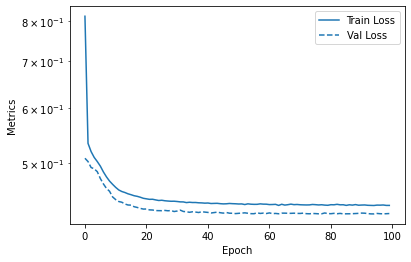

In [56]:
plot_metric(history, ['Loss'], 0,['loss'])

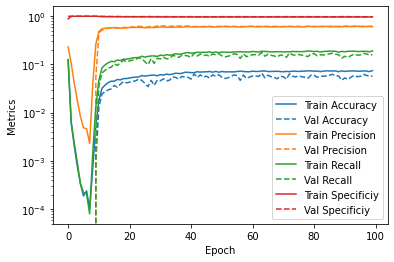

In [57]:
plot_metric(history, ['Accuracy', 'Precision','Recall', 'Specificiy'], 0,['masked_accuracy', 'masked_precision','masked_recall', 'masked_specificity'])

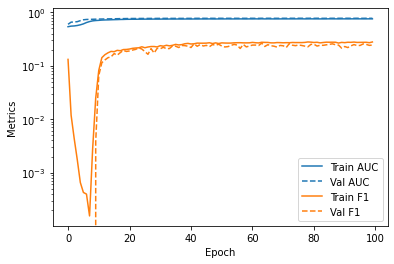

In [58]:
plot_metric(history, ['AUC', 'F1'], 0,['masked_AUC', 'masked_f1'])

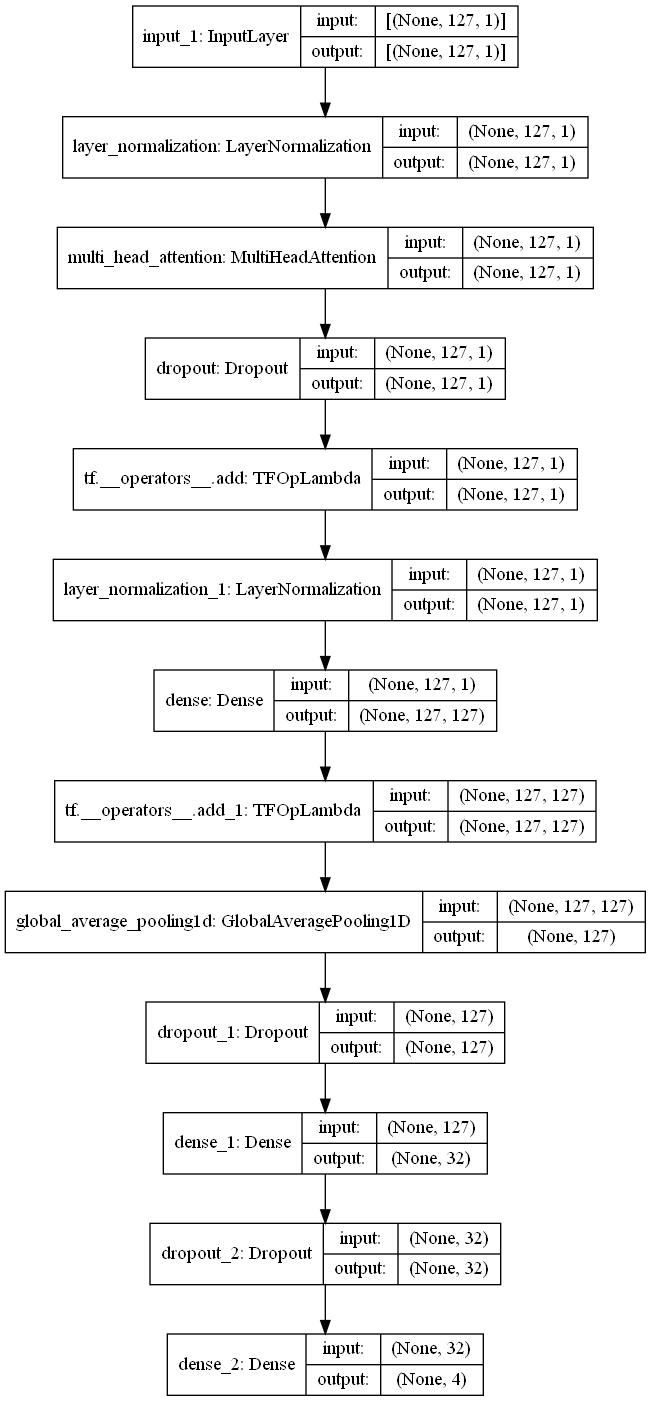

In [54]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
#SVG(model_to_dot(model,show_shapes = True).create(prog='dot', format='svg'))
from keras.utils.vis_utils import plot_model
plot_model(model, show_shapes=True, show_layer_names=True, expand_nested=False, to_file='Trasformer_model.png')
#plot_model(model, show_shapes=True, show_layer_names=True)

In [68]:
attention_layer = model.layers[2]
attention_layer

In [61]:
_, attention_scores = attention_layer(test_data_reshaped[:1], test_data_reshaped[:1], return_attention_scores=True) # take one sample

In [78]:
test_data_reshaped.shape

(3941, 127, 1)

In [69]:
attention_scores

<tf.Tensor: shape=(1, 2, 127, 127), dtype=float32, numpy=
array([[[[1.59039342e-08, 4.02388722e-03, 8.03193823e-03, ...,
          8.03193823e-03, 4.02388722e-03, 4.02388722e-03],
         [3.95509740e-03, 7.62834959e-03, 7.91186932e-03, ...,
          7.91186932e-03, 7.62834959e-03, 7.62834959e-03],
         [7.85607193e-03, 7.87322689e-03, 7.87418149e-03, ...,
          7.87418149e-03, 7.87322689e-03, 7.87322689e-03],
         ...,
         [7.85607193e-03, 7.87322689e-03, 7.87418149e-03, ...,
          7.87418149e-03, 7.87322689e-03, 7.87322689e-03],
         [3.95509740e-03, 7.62834959e-03, 7.91186932e-03, ...,
          7.91186932e-03, 7.62834959e-03, 7.62834959e-03],
         [3.95509740e-03, 7.62834959e-03, 7.91186932e-03, ...,
          7.91186932e-03, 7.62834959e-03, 7.62834959e-03]],

        [[1.00185524e-07, 4.42801556e-03, 8.02208018e-03, ...,
          8.02208018e-03, 4.42801556e-03, 4.42801369e-03],
         [4.35432745e-03, 7.66329281e-03, 7.90776964e-03, ...,
         

In [70]:
a=attention_scores>0.0002
b=attention_scores[a]
b

<tf.Tensor: shape=(32256,), dtype=float32, numpy=
array([0.00402389, 0.00803194, 0.00803194, ..., 0.00790777, 0.00766329,
       0.00766329], dtype=float32)>

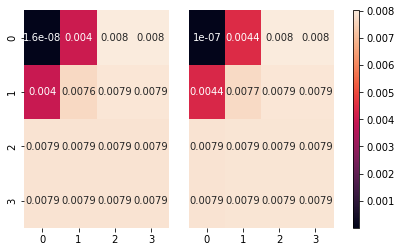

In [74]:
import seaborn as sb
fig, axs = plt.subplots(ncols=3, gridspec_kw=dict(width_ratios=[5,5,0.2]))
sb.heatmap(attention_scores[0, 0, :4, :4], annot=True, cbar=False, ax=axs[0])
sb.heatmap(attention_scores[0, 1, :4, :4], annot=True, yticklabels=False, cbar=False, ax=axs[1])
fig.colorbar(axs[1].collections[0], cax=axs[2])
plt.show()

In [38]:
custom_objects = {'masked_AUC': masked_AUC, 'masked_accuracy':masked_accuracy,
      'masked_precision':masked_precision,
      'masked_recall':masked_recall,
      'masked_f1':masked_f1,
      'masked_Specificity':masked_specificity,
      'masked_f1_loss':masked_loss_function}
model2 = tf.keras.models.load_model('../output/Tranformer_Model_1_UnComplicated_BE_dropped/', custom_objects=custom_objects, compile=False)

In [114]:
x_test_tfidf.shape

(3941, 127)

In [40]:
x_test_tfidf=test_feature_df.reset_index(drop=True)
y_test_tfidf =test_label_df[antibitics_abx_list].reset_index(drop=True)
sample_size = x_test_tfidf.values.shape[0] # number of samples in train set
time_steps  = x_test_tfidf.values.shape[1] # number of features in train set
input_dimension=1
test_data_reshaped =x_test_tfidf.values.reshape(sample_size,time_steps,input_dimension)
model2.compile(loss=masked_loss_function,
                optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
                metrics=METRICS)
model2.evaluate(test_data_reshaped, y_test_tfidf, verbose=0)

C:\Users\mt01034\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\data\ops\dataset_ops.py:3704: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable.debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "
C:\Users\mt01034\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\data\ops\dataset_ops.py:3704: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable.debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


[0.32091280817985535,
 0.0010080644860863686,
 0.02688172087073326,
 0.0037290509790182114,
 0.9994400143623352,
 0.006470519118010998,
 0.6969201564788818]

In [116]:
corr = dropped_features.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

C:\Users\mt01034\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:2: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  


In [117]:
s = corr.unstack()
so = s.sort_values(kind="quicksort")

In [121]:
# Create a mask

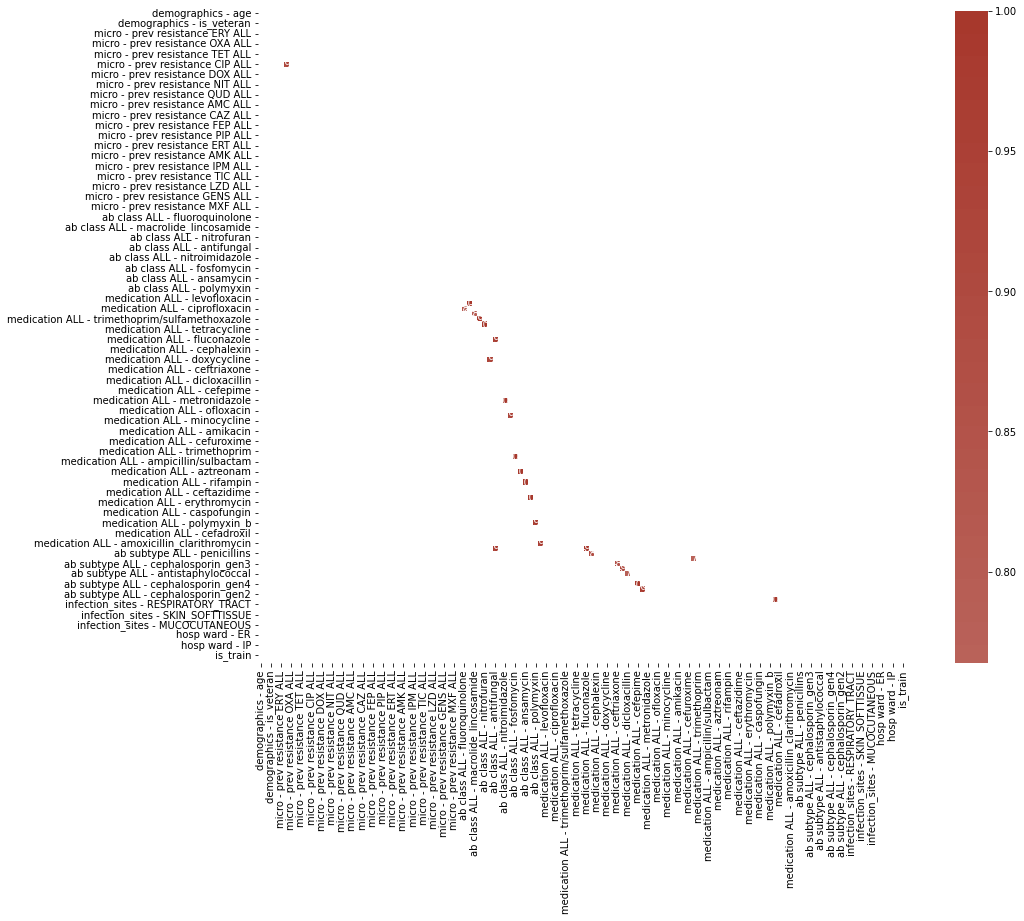

In [125]:
import seaborn as sns
#plt.figure(figsize=(12,8))
#sns.heatmap(kot, cmap="Greens")

import seaborn as sns
mask = np.triu(np.ones_like(kot, dtype=bool))
kot = corr[corr>=.75]
# Create a custom divergin palette
cmap = sns.diverging_palette(250, 15, s=75, l=40,
                            n=9, center="light", as_cmap=True)

plt.figure(figsize=(16, 12))
sns.heatmap(kot, mask=mask, center=0, annot=True,
            fmt='.2f', square=True, cmap=cmap)

plt.show()

In [41]:
def get_gradients(img_input, top_pred_idx):
    """Computes the gradients of outputs w.r.t input image.

    Args:
        img_input: 4D image tensor
        top_pred_idx: Predicted label for the input image

    Returns:
        Gradients of the predictions w.r.t img_input
    """
    #print(img_input.shape)
    images = tf.cast(img_input, tf.float32)
    #print(images.shape)
    with tf.GradientTape() as tape:
        tape.watch(images)
        preds = model(images)
        #print (preds)
        top_class = preds[:, top_pred_idx]
        #print (top_class)


    grads = tape.gradient(top_class, images)
    return grads

In [191]:
def get_integrated_gradients(img_input, top_pred_idx, model=model, baseline=None, num_steps=50):
    """Computes Integrated Gradients for a predicted label.

    Args:
        img_input (ndarray): Original image
        top_pred_idx: Predicted label for the input image
        baseline (ndarray): The baseline image to start with for interpolation
        num_steps: Number of interpolation steps between the baseline
            and the input used in the computation of integrated gradients. These
            steps along determine the integral approximation error. By default,
            num_steps is set to 50.

    Returns:
        Integrated gradients w.r.t input image
    """
    # If baseline is not provided, start with a black image
    # having same size as the input image.
    if baseline is None:
        baseline = np.zeros(img_input.shape).astype(np.float32)
    else:
        baseline = baseline.astype(np.float32)

    # 1. Do interpolation.
    #print(img_input.shape)
    #print(baseline.shape)
    #print((img_input - baseline))
    img_input = img_input.astype(np.float32)
    interpolated_image = [
        baseline + (step / num_steps) * (img_input - baseline)
        for step in range(num_steps + 1)
    ]
    interpolated_image = np.array(interpolated_image).astype(np.float32)

    # 2. Preprocess the interpolated images
    #interpolated_image = xception.preprocess_input(interpolated_image)

    # 3. Get the gradients
    grads = []
    for i, img in enumerate(interpolated_image):
        #img = tf.expand_dims(img, axis=0)
        grad = get_gradients(img, top_pred_idx=top_pred_idx)
        grads.append(grad[0])
    grads = tf.convert_to_tensor(grads, dtype=tf.float32)

    # 4. Approximate the integral using the trapezoidal rule
    grads = (grads[:-1] + grads[1:]) / 2.0
    #avg_grads = tf.reduce_mean(grads, axis=0)

    # 5. Calculate integrated gradients and return
    integrated_grads = (img_input - baseline) * grads
    return integrated_grads

In [89]:
TotShapeP=[]
TotShape0P=[]
TotShape1P=[]
TotShape2P=[]
TotShape3P=[]
TotShapeN=[]
TotShape0N=[]
TotShape1N=[]
TotShape2N=[]
TotShape3N=[]

In [43]:
y_val_tfidf.iloc[0][1]

NameError: name 'y_val_tfidf' is not defined

In [92]:
model=model2

In [93]:
for i in range(x_val_tfidfx_val_reshaped.shape[0]):    
    test_data_reshaped_i=x_val_tfidfx_val_reshaped[i].reshape(1,x_val_tfidfx_val_reshaped[i].shape[0],x_val_tfidfx_val_reshaped[i].shape[1])
    for j in range(4):
        igrads = get_integrated_gradients(test_data_reshaped_i, top_pred_idx=j, num_steps=50)
        avg_grads = tf.reduce_mean(igrads, axis=0)
        if (j==0 and y_val_tfidf.iloc[i][j]==1.0):
            TotShape0P.append(avg_grads)
        elif (j==1 and y_val_tfidf.iloc[i][j]==1.0):
            TotShape1P.append(avg_grads)
        elif (j==2 and y_val_tfidf.iloc[i][j]==1.0):
            TotShape2P.append(avg_grads)
        elif (j==3 and y_val_tfidf.iloc[i][j]==1.0):
            TotShape3P.append(avg_grads)
        elif (j==0 and y_val_tfidf.iloc[i][j]==0.0):
            TotShape0N.append(avg_grads)
        elif (j==1 and y_val_tfidf.iloc[i][j]==0.0):
            TotShape1N.append(avg_grads)
        elif (j==2 and y_val_tfidf.iloc[i][j]==0.0):
            TotShape2N.append(avg_grads)
        elif (j==3 and y_val_tfidf.iloc[i][j]==0.0):
            TotShape3N.append(avg_grads)

In [111]:
TotShapedf0P = pd.DataFrame(columns=x_val_tfidf.columns.values)
TotShapedf0N = pd.DataFrame(columns=x_val_tfidf.columns.values)
for shp in TotShape0P:
    #print (shp.shape)
    Valuelist=[]
    with tf.compat.v1.Session() as sess:  
        for value in (shp.numpy()):
            #print(value.shape)
            [singleitem] = value
            #print(singleitem)
            Valuelist.append(singleitem)
    a_series = pd.Series(Valuelist, index = x_val_tfidf.columns)
    TotShapedf0P = TotShapedf0P.append(a_series, ignore_index=True)
for shp in TotShape0N:
    #print (shp.shape)
    Valuelist=[]
    with tf.compat.v1.Session() as sess:  
        for value in (shp.numpy()):
            #print(value.shape)
            [singleitem] = value
            #print(singleitem)
            Valuelist.append(singleitem)
    a_series = pd.Series(Valuelist, index = x_val_tfidf.columns)
    TotShapedf0N = TotShapedf0N.append(a_series, ignore_index=True)


TotShapedf1P = pd.DataFrame(columns=x_val_tfidf.columns.values)
TotShapedf1N = pd.DataFrame(columns=x_val_tfidf.columns.values)
for shp in TotShape1P:
    #print (shp.shape)
    Valuelist=[]
    with tf.compat.v1.Session() as sess:  
        for value in (shp.numpy()):
            #print(value.shape)
            [singleitem] = value
            #print(singleitem)
            Valuelist.append(singleitem)
    a_series = pd.Series(Valuelist, index = x_val_tfidf.columns)
    TotShapedf1P = TotShapedf1P.append(a_series, ignore_index=True)
for shp in TotShape1N:
    #print (shp.shape)
    Valuelist=[]
    with tf.compat.v1.Session() as sess:  
        for value in (shp.numpy()):
            #print(value.shape)
            [singleitem] = value
            #print(singleitem)
            Valuelist.append(singleitem)
    a_series = pd.Series(Valuelist, index = x_val_tfidf.columns)
    TotShapedf1N = TotShapedf1N.append(a_series, ignore_index=True)


TotShapedf2P = pd.DataFrame(columns=x_val_tfidf.columns.values)
TotShapedf2N = pd.DataFrame(columns=x_val_tfidf.columns.values)
for shp in TotShape2P:
    #print (shp.shape)
    Valuelist=[]
    with tf.compat.v1.Session() as sess:  
        for value in (shp.numpy()):
            #print(value.shape)
            [singleitem] = value
            #print(singleitem)
            Valuelist.append(singleitem)
    a_series = pd.Series(Valuelist, index = x_val_tfidf.columns)
    TotShapedf2P = TotShapedf2P.append(a_series, ignore_index=True)
for shp in TotShape2N:
    #print (shp.shape)
    Valuelist=[]
    with tf.compat.v1.Session() as sess:  
        for value in (shp.numpy()):
            #print(value.shape)
            [singleitem] = value
            #print(singleitem)
            Valuelist.append(singleitem)
    a_series = pd.Series(Valuelist, index = x_val_tfidf.columns)
    TotShapedf2N = TotShapedf2N.append(a_series, ignore_index=True)

TotShapedf3P = pd.DataFrame(columns=x_val_tfidf.columns.values)
TotShapedf3N = pd.DataFrame(columns=x_val_tfidf.columns.values)
for shp in TotShape3P:
    #print (shp.shape)
    Valuelist=[]
    with tf.compat.v1.Session() as sess:  
        for value in (shp.numpy()):
            #print(value.shape)
            [singleitem] = value
            #print(singleitem)
            Valuelist.append(singleitem)
    a_series = pd.Series(Valuelist, index = x_val_tfidf.columns)
    TotShapedf3P = TotShapedf3P.append(a_series, ignore_index=True)
for shp in TotShape3N:
    #print (shp.shape)
    Valuelist=[]
    with tf.compat.v1.Session() as sess:  
        for value in (shp.numpy()):
            #print(value.shape)
            [singleitem] = value
            #print(singleitem)
            Valuelist.append(singleitem)
    a_series = pd.Series(Valuelist, index = x_val_tfidf.columns)
    TotShapedf3N = TotShapedf3N.append(a_series, ignore_index=True)

In [141]:
TotShapedf0 = TotShapedf0N.append(TotShapedf0P, ignore_index=True)
TotShapedf1 = TotShapedf1N.append(TotShapedf1P, ignore_index=True)
TotShapedf2 = TotShapedf2N.append(TotShapedf2P, ignore_index=True)
TotShapedf3 = TotShapedf3N.append(TotShapedf3P, ignore_index=True)

In [143]:
TotShapedf = TotShapedf0.append(TotShapedf1, ignore_index=True)
TotShapedf = TotShapedf.append(TotShapedf2, ignore_index=True)
TotShapedf = TotShapedf.append(TotShapedf3, ignore_index=True)

In [112]:
madNG0P = TotShapedf0P.mean()
madNG0N = TotShapedf0N.mean()
madNG1P = TotShapedf1P.mean()
madNG1N = TotShapedf1N.mean()
madNG2P = TotShapedf2P.mean()
madNG2N = TotShapedf2N.mean()
madNG3P = TotShapedf3P.mean()
madNG3N = TotShapedf3N.mean()
#print (madNG)

In [142]:
madNG0 = TotShapedf0.mad()
madNG1 = TotShapedf1.mad()
madNG2 = TotShapedf2.mad()
madNG3 = TotShapedf3.mad()

In [144]:
madNG=TotShapedf.mad()

In [126]:
var0P = TotShapedf0P.var()
var0N = TotShapedf0N.var()
var1P = TotShapedf1P.var()
var1N = TotShapedf1N.var()
var2P = TotShapedf2P.var()
var2N = TotShapedf2N.var()
var3P = TotShapedf3P.var()
var3N = TotShapedf3N.var()

In [151]:
data = [madNG0P,madNG0N,madNG1P,madNG1N]
df = pd.DataFrame.from_dict(data)
df

,demographics - age,demographics - is_white,demographics - is_veteran,micro - prev resistance CFZ ALL,micro - prev resistance ERY ALL,micro - prev resistance LVX ALL,micro - prev resistance OXA ALL,micro - prev resistance PEN ALL,micro - prev resistance TET ALL,micro - prev resistance AMP ALL,...,infection_sites - BLOOD,infection_sites - SKIN_SOFTTISSUE,infection_sites - ABSCESS_OR_FLUID_NOS,infection_sites - MUCOCUTANEOUS,infection_sites - GENITOURINARY,hosp ward - ER,hosp ward - ICU,hosp ward - IP,hosp ward - OP,uncomplicated
0,0.007606,-0.002434,0.001618,-0.003905,-0.000382,0.008182,-0.000115,-0.000944,0.001567,0.001271,...,-0.000026,0.000216,0.000057,0.000008,0.000010,0.001091,0.002593,0.007982,-0.006822,-0.002037
1,0.003776,-0.002544,0.001178,-0.004508,-0.000284,0.004109,-0.000010,-0.000410,0.001022,0.000581,...,-0.000022,0.000082,0.000020,0.000004,0.000014,0.000835,0.001510,0.005590,-0.009274,-0.004693
2,0.010610,-0.017021,0.000082,-0.010815,-0.000884,0.006380,-0.000975,-0.002256,0.005450,0.003509,...,0.000511,0.000101,0.000015,0.000000,-0.000018,0.003907,0.000547,0.002340,-0.004779,-0.003132
3,0.006691,-0.021608,-0.000050,-0.011012,-0.000291,0.002987,-0.000584,-0.001112,0.002918,0.001651,...,0.000432,0.000082,0.000004,0.000015,-0.000006,0.003867,0.000221,0.001756,-0.004752,-0.003814


In [113]:
#avg_grads.shape
listoftupleNG0P=[(i,e) for i, e in enumerate(madNG0P) if e != 0]
listoftupleNG0N=[(i,e) for i, e in enumerate(madNG0N) if e != 0]
listoftupleNG1P=[(i,e) for i, e in enumerate(madNG1P) if e != 0]
listoftupleNG1N=[(i,e) for i, e in enumerate(madNG1N) if e != 0]
listoftupleNG2P=[(i,e) for i, e in enumerate(madNG2P) if e != 0]
listoftupleNG2N=[(i,e) for i, e in enumerate(madNG2N) if e != 0]
listoftupleNG3P=[(i,e) for i, e in enumerate(madNG3P) if e != 0]
listoftupleNG3N=[(i,e) for i, e in enumerate(madNG3N) if e != 0]
#value=[e for i, e in enumerate(mad) if e != 0]
#listoftuple
from operator import itemgetter, attrgetter    
listoftuple_NG0P=sorted(listoftupleNG0P, key=itemgetter(1),reverse=True)
listoftuple_NG0N=sorted(listoftupleNG0N, key=itemgetter(1),reverse=True)
listoftuple_NG1P=sorted(listoftupleNG1P, key=itemgetter(1),reverse=True)
listoftuple_NG1N=sorted(listoftupleNG1N, key=itemgetter(1),reverse=True)
listoftuple_NG2P=sorted(listoftupleNG2P, key=itemgetter(1),reverse=True)
listoftuple_NG2N=sorted(listoftupleNG2N, key=itemgetter(1),reverse=True)
listoftuple_NG3P=sorted(listoftupleNG3P, key=itemgetter(1),reverse=True)
listoftuple_NG3N=sorted(listoftupleNG3N, key=itemgetter(1),reverse=True)

In [127]:
indexlistNG0P=[]
vallistNG0P=[]
indexlistNG0N=[]
vallistNG0N=[]
indexlistNG1P=[]
vallistNG1P=[]
indexlistNG1N=[]
vallistNG1N=[]
indexlistNG2P=[]
vallistNG2P=[]
indexlistNG2N=[]
vallistNG2N=[]
indexlistNG3P=[]
vallistNG3P=[]
indexlistNG3N=[]
vallistNG3N=[]

n=0
for i,val in listoftuple_NG0P:
    print(x_val_tfidf.columns[i])
    indexlistNG0P.append(x_val_tfidf.columns[i])
    vallistNG0P.append(val)
    df2 = pd.DataFrame({"ID":[x_val_tfidf.columns[i]],
                    "MAD":[val], 
                    "Var":[var0P[i]],
                    "Label":['0P']
                    })
    if (n==0):
        df1=df2
    else:
        df1=df1.append(df2, ignore_index = True)
    n=n+1
#df1.to_csv('../output/IG_Feature_final.csv')

for i,val in listoftuple_NG0N:
    print(x_val_tfidf.columns[i])
    indexlistNG0N.append(x_val_tfidf.columns[i])
    vallistNG0N.append(val)
    df2 = pd.DataFrame({"ID":[x_val_tfidf.columns[i]],
                    "MAD":[val], 
                    "Var":[var0N[i]],
                    "Label":['0N']
                    })
    
    df1=df1.append(df2, ignore_index = True)
    n=n+1

for i,val in listoftuple_NG1P:
    print(x_val_tfidf.columns[i])
    indexlistNG1P.append(x_val_tfidf.columns[i])
    vallistNG1P.append(val)
    df2 = pd.DataFrame({"ID":[x_val_tfidf.columns[i]],
                    "MAD":[val], 
                    "Var":[var1P[i]],
                    "Label":['1P']
                    })
   
    df1=df1.append(df2, ignore_index = True)
    n=n+1
#df1.to_csv('../output/IG_Feature_final.csv')

for i,val in listoftuple_NG1N:
    print(x_val_tfidf.columns[i])
    indexlistNG1N.append(x_val_tfidf.columns[i])
    vallistNG1N.append(val)
    df2 = pd.DataFrame({"ID":[x_val_tfidf.columns[i]],
                    "MAD":[val], 
                    "Var":[var1N[i]],
                    "Label":['1N']
                    })
    
    df1=df1.append(df2, ignore_index = True)
    n=n+1

for i,val in listoftuple_NG2P:
    print(x_val_tfidf.columns[i])
    indexlistNG2P.append(x_val_tfidf.columns[i])
    vallistNG2P.append(val)
    df2 = pd.DataFrame({"ID":[x_val_tfidf.columns[i]],
                    "MAD":[val], 
                    "Var":[var2P[i]],
                    "Label":['2P']
                    })
   
    df1=df1.append(df2, ignore_index = True)
    n=n+1
#df1.to_csv('../output/IG_Feature_final.csv')

for i,val in listoftuple_NG2N:
    print(x_val_tfidf.columns[i])
    indexlistNG2N.append(x_val_tfidf.columns[i])
    vallistNG2N.append(val)
    df2 = pd.DataFrame({"ID":[x_val_tfidf.columns[i]],
                    "MAD":[val], 
                    "Var":[var2N[i]],
                    "Label":['2N']
                    })
    
    df1=df1.append(df2, ignore_index = True)
    n=n+1

for i,val in listoftuple_NG3P:
    print(x_val_tfidf.columns[i])
    indexlistNG3P.append(x_val_tfidf.columns[i])
    vallistNG3P.append(val)
    df2 = pd.DataFrame({"ID":[x_val_tfidf.columns[i]],
                    "MAD":[val], 
                    "Var":[var3P[i]],
                    "Label":['3P']
                    })
   
    df1=df1.append(df2, ignore_index = True)
    n=n+1
#df1.to_csv('../output/IG_Feature_final.csv')

for i,val in listoftuple_NG3N:
    print(x_val_tfidf.columns[i])
    indexlistNG3N.append(x_val_tfidf.columns[i])
    vallistNG3N.append(val)
    df2 = pd.DataFrame({"ID":[x_val_tfidf.columns[i]],
                    "MAD":[val], 
                    "Var":[var3N[i]],
                    "Label":['3N']
                    })
    
    df1=df1.append(df2, ignore_index = True)
    n=n+1

df1.to_csv('../output/IG_Feature_final.csv')

micro - prev resistance NIT ALL
micro - prev resistance LVX ALL
hosp ward - IP
demographics - age
micro - prev resistance CIP ALL
ab class ALL - glycopeptides
medication ALL - vancomycin
medication ALL - levofloxacin
hosp ward - ICU
ab subtype ALL - cephalosporin_gen4
medication ALL - cefepime
medication ALL - ciprofloxacin
micro - prev resistance VAN ALL
ab subtype ALL - cephalosporin_gen3
ab subtype ALL - carbapenem
medication ALL - cefazolin
ab class ALL - fluoroquinolone
demographics - is_veteran
ab class ALL - nitroimidazole
medication ALL - metronidazole
micro - prev resistance TET ALL
micro - prev resistance ATM ALL
micro - prev resistance CRO ALL
medication ALL - ceftazidime
micro - prev resistance FEP ALL
micro - prev resistance AMP ALL
hosp ward - ER
micro - prev resistance GEN ALL
ab class ALL - oxazolidinones
micro - prev resistance IPM ALL
medication ALL - linezolid
ab class ALL - beta_lactam
medication ALL - ceftriaxone
micro - prev resistance CAZ ALL
ab subtype ALL - cep

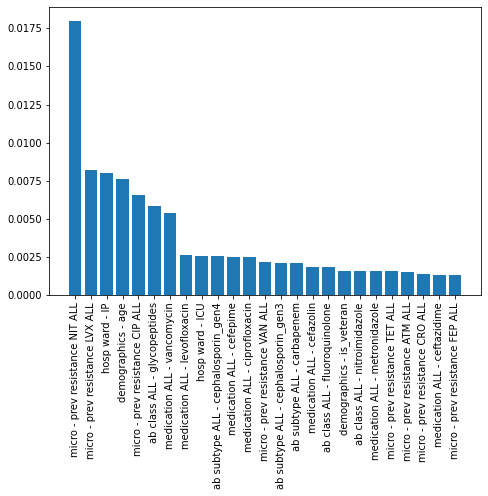

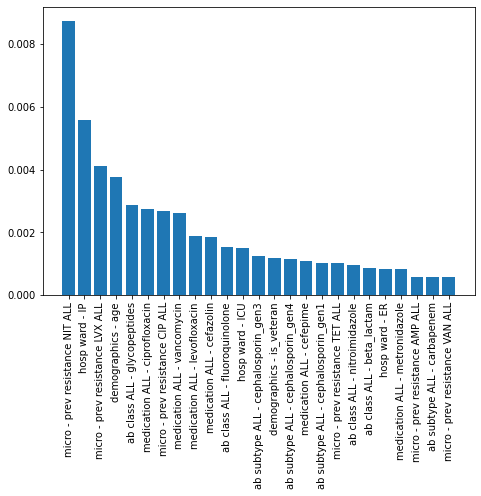

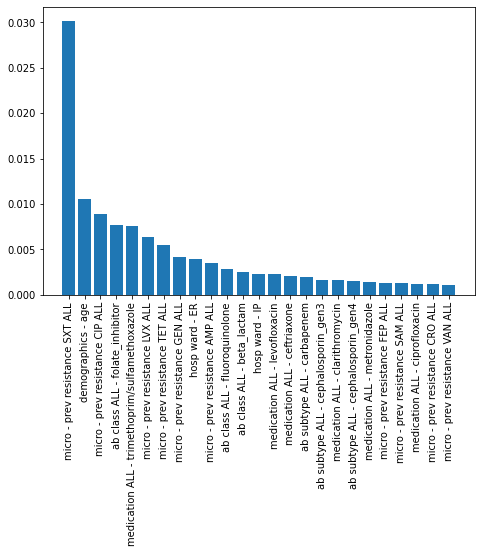

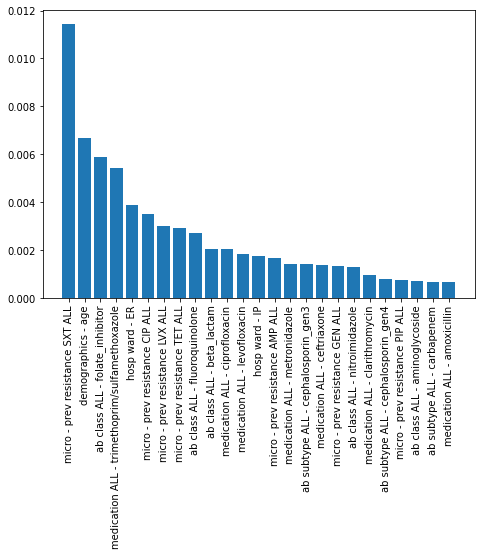

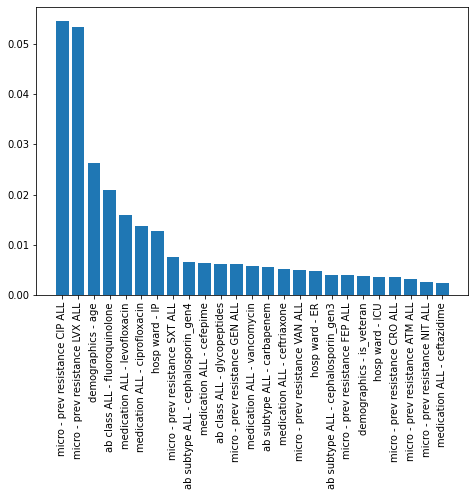

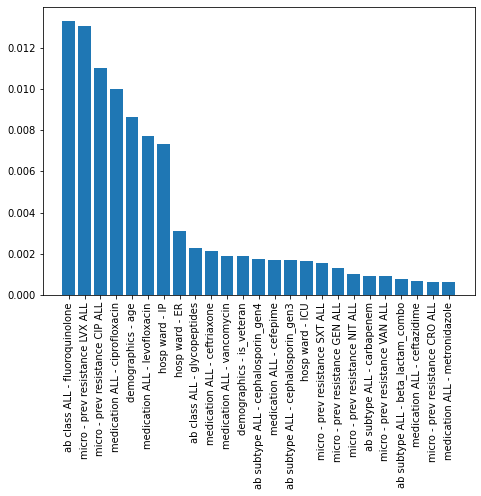

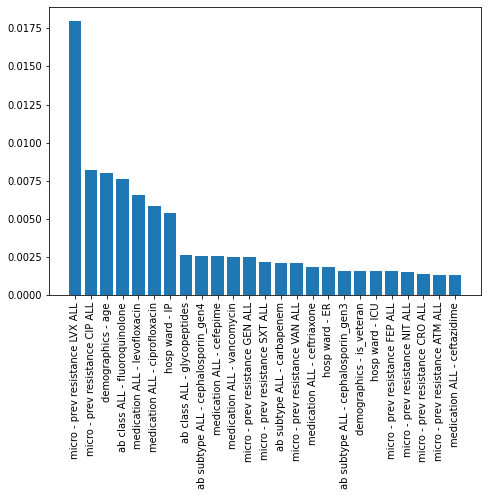

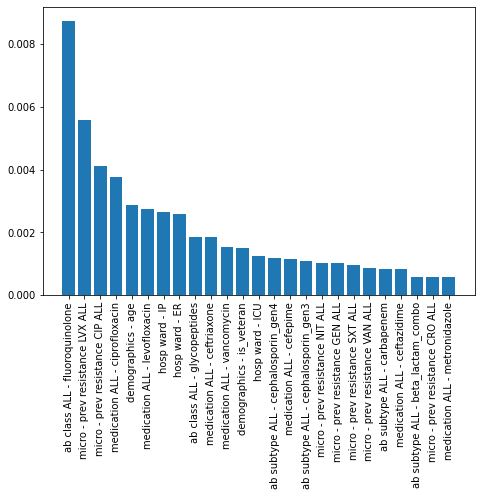

In [134]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
plt.xticks(rotation='vertical')
ax.bar(indexlistNG0P[:25],vallistNG0P[:25])
plt.show()

import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
plt.xticks(rotation='vertical')
ax.bar(indexlistNG0N[:25],vallistNG0N[:25])
plt.show()

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
plt.xticks(rotation='vertical')
ax.bar(indexlistNG1P[:25],vallistNG1P[:25])
plt.show()

import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
plt.xticks(rotation='vertical')
ax.bar(indexlistNG1N[:25],vallistNG1N[:25])
plt.show()

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
plt.xticks(rotation='vertical')
ax.bar(indexlistNG2P[:25],vallistNG2P[:25])
plt.show()

import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
plt.xticks(rotation='vertical')
ax.bar(indexlistNG2N[:25],vallistNG2N[:25])
plt.show()

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
plt.xticks(rotation='vertical')
ax.bar(indexlistNG3P[:25],vallistNG0P[:25])
plt.show()

import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
plt.xticks(rotation='vertical')
ax.bar(indexlistNG3N[:25],vallistNG0N[:25])
plt.show()

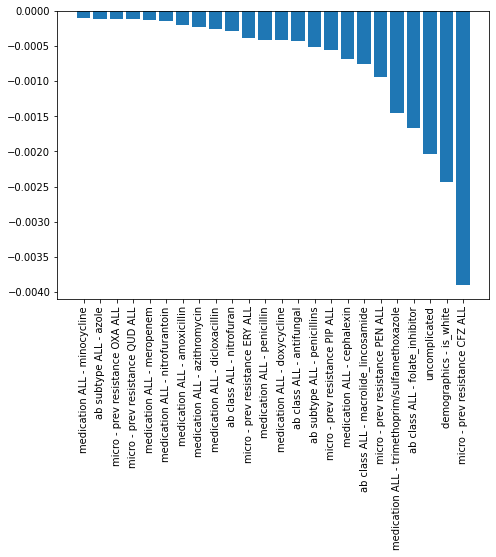

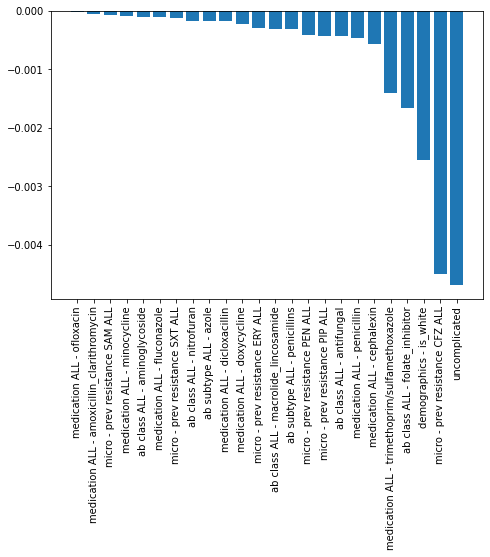

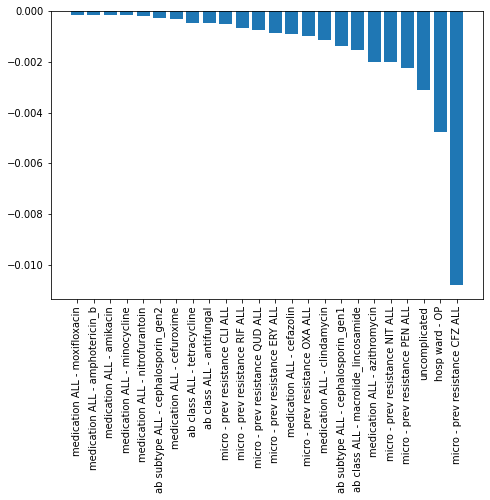

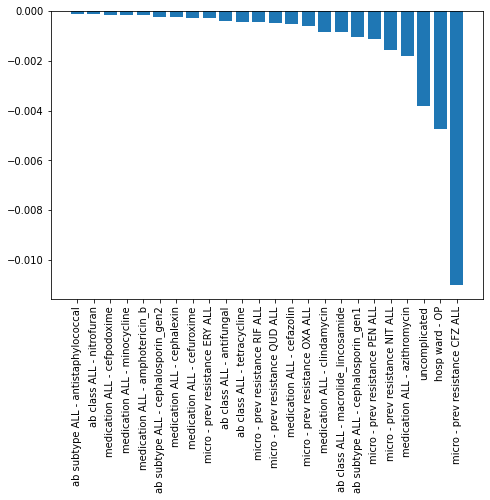

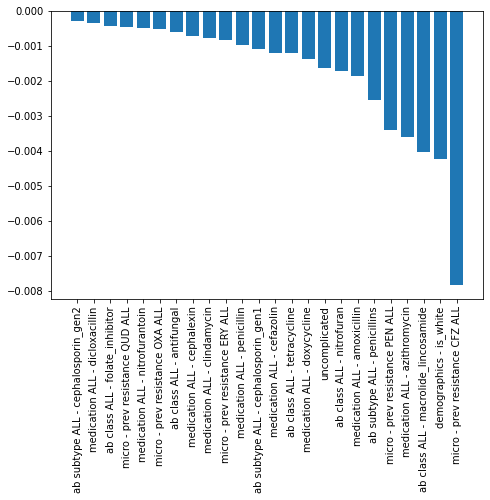

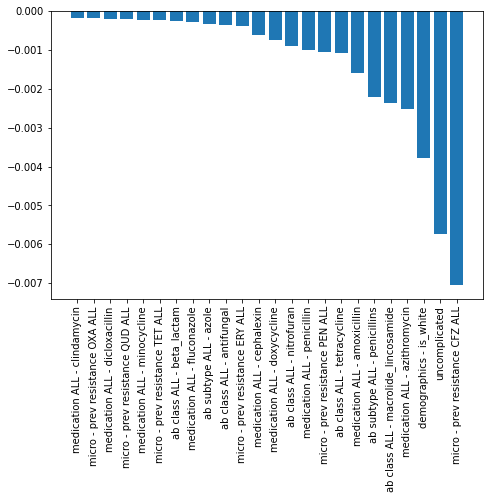

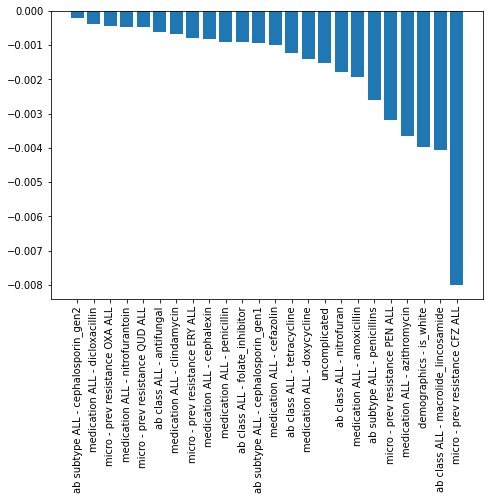

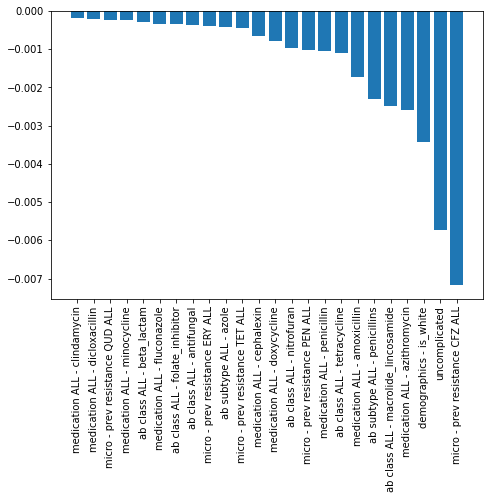

In [135]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
plt.xticks(rotation='vertical')
ax.bar(indexlistNG0P[-25:-1],vallistNG0P[-25:-1])
plt.show()

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
plt.xticks(rotation='vertical')
ax.bar(indexlistNG0N[-25:-1],vallistNG0N[-25:-1])
plt.show()

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
plt.xticks(rotation='vertical')
ax.bar(indexlistNG1P[-25:-1],vallistNG1P[-25:-1])
plt.show()

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
plt.xticks(rotation='vertical')
ax.bar(indexlistNG1N[-25:-1],vallistNG1N[-25:-1])
plt.show()

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
plt.xticks(rotation='vertical')
ax.bar(indexlistNG2P[-25:-1],vallistNG2P[-25:-1])
plt.show()

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
plt.xticks(rotation='vertical')
ax.bar(indexlistNG2N[-25:-1],vallistNG2N[-25:-1])
plt.show()

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
plt.xticks(rotation='vertical')
ax.bar(indexlistNG3P[-25:-1],vallistNG3P[-25:-1])
plt.show()

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
plt.xticks(rotation='vertical')
ax.bar(indexlistNG3N[-25:-1],vallistNG3N[-25:-1])
plt.show()

In [156]:
madNG
istoftupleNG=[(i,e) for i, e in enumerate(madNG) if e != 0]
listoftuple_NG=sorted(istoftupleNG, key=itemgetter(1),reverse=True)

indexlistNG=[]
vallistNG=[]
for i,val in listoftuple_NG:
    print(x_val_tfidf.columns[i])
    indexlistNG.append(x_val_tfidf.columns[i])
    vallistNG.append(val)

micro - prev resistance LVX ALL
micro - prev resistance CIP ALL
demographics - age
ab class ALL - fluoroquinolone
hosp ward - IP
hosp ward - OP
micro - prev resistance CFZ ALL
medication ALL - ciprofloxacin
micro - prev resistance SXT ALL
medication ALL - levofloxacin
demographics - is_white
uncomplicated
micro - prev resistance NIT ALL
hosp ward - ER
ab class ALL - glycopeptides
medication ALL - vancomycin
ab subtype ALL - cephalosporin_gen4
medication ALL - cefepime
medication ALL - ceftriaxone
micro - prev resistance GEN ALL
hosp ward - ICU
medication ALL - azithromycin
ab subtype ALL - cephalosporin_gen3
ab class ALL - folate_inhibitor
demographics - is_veteran
medication ALL - trimethoprim/sulfamethoxazole
ab subtype ALL - carbapenem
ab class ALL - macrolide_lincosamide
micro - prev resistance VAN ALL
ab subtype ALL - penicillins
micro - prev resistance PEN ALL
micro - prev resistance TET ALL
micro - prev resistance CRO ALL
micro - prev resistance FEP ALL
micro - prev resistance A

In [167]:
len(feature_list)

790

In [177]:
#Add
def Add_index_AUC(x_test,y_test_tfidf,feature_list, model):
    #x_feature_list=indexlistNG[:10]
    masklist = list(set(Droped_feature_list) - set(feature_list))
    x_test_cpy=x_test.copy()
    x_test_cpy[masklist]=0
    #print(x_test_cpy.shape)
    x_test_cpy=x_test_cpy.reset_index(drop=True)
    #y_test_tfidf =test_label_df[antibitics_abx_list].reset_index(drop=True)
    sample_size = x_test_cpy.values.shape[0] # number of samples in train set
    time_steps  = x_test_cpy.values.shape[1] # number of features in train set
    input_dimension=1
    test_data_reshaped =x_test_cpy.values.reshape(sample_size,time_steps,input_dimension)
    model.compile(loss=masked_loss_function,
                    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
                    metrics=METRICS)
    metrc=model.evaluate(test_data_reshaped, y_test_tfidf, verbose=0)
    return metrc[6]

In [179]:
x_feature_list=indexlistNG[:10]
y_test_tfidf =test_label_df[antibitics_abx_list].reset_index(drop=True)
print (Add_index_AUC(x_test_tfidf,y_test_tfidf,x_feature_list,model2)*100)


C:\Users\mt01034\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\data\ops\dataset_ops.py:3704: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable.debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


68.05803179740906


In [180]:
x_feature_list=indexlistNG[:25]
y_test_tfidf =test_label_df[antibitics_abx_list].reset_index(drop=True)
print (Add_index_AUC(x_test_tfidf,y_test_tfidf,x_feature_list,model2)*100)

C:\Users\mt01034\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\data\ops\dataset_ops.py:3704: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable.debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


69.55953240394592


In [181]:
x_feature_list=indexlistNG[:50]
y_test_tfidf =test_label_df[antibitics_abx_list].reset_index(drop=True)
print (Add_index_AUC(x_test_tfidf,y_test_tfidf,x_feature_list,model2)*100)

C:\Users\mt01034\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\data\ops\dataset_ops.py:3704: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable.debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


69.75192427635193


In [182]:
x_feature_list=indexlistNG[:100]
y_test_tfidf =test_label_df[antibitics_abx_list].reset_index(drop=True)
print (Add_index_AUC(x_test_tfidf,y_test_tfidf,x_feature_list,model2)*100)

C:\Users\mt01034\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\data\ops\dataset_ops.py:3704: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable.debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


69.72253322601318


In [198]:
x_feature_list=list(set(indexlistNG0P[:10]+indexlistNG0N[:10]+indexlistNG1P[:10]+indexlistNG1N[:10]
+indexlistNG2P[:10]+indexlistNG2N[:10]+indexlistNG3P[:10]+indexlistNG3N[:10]))
print (len(x_feature_list))
y_test_tfidf =test_label_df[antibitics_abx_list].reset_index(drop=True)
print (Add_index_AUC(x_test_tfidf,y_test_tfidf,x_feature_list,model2)*100)

23


C:\Users\mt01034\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\data\ops\dataset_ops.py:3704: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable.debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "
C:\Users\mt01034\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\data\ops\dataset_ops.py:3704: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable.debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


67.20966100692749


In [199]:
n=25
x_feature_list=list(set(indexlistNG0P[:n]+indexlistNG0N[:n]+indexlistNG1P[:n]+indexlistNG1N[:n]
+indexlistNG2P[:n]+indexlistNG2N[:n]+indexlistNG3P[:n]+indexlistNG3N[:n]))
print (len(x_feature_list))
y_test_tfidf =test_label_df[antibitics_abx_list].reset_index(drop=True)
print (Add_index_AUC(x_test_tfidf,y_test_tfidf,x_feature_list,model2)*100)

40


C:\Users\mt01034\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\data\ops\dataset_ops.py:3704: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable.debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "
C:\Users\mt01034\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\data\ops\dataset_ops.py:3704: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable.debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


67.4864113330841


In [200]:
n=50
x_feature_list=list(set(indexlistNG0P[:n]+indexlistNG0N[:n]+indexlistNG1P[:n]+indexlistNG1N[:n]
+indexlistNG2P[:n]+indexlistNG2N[:n]+indexlistNG3P[:n]+indexlistNG3N[:n]))
print (len(x_feature_list))
y_test_tfidf =test_label_df[antibitics_abx_list].reset_index(drop=True)
print (Add_index_AUC(x_test_tfidf,y_test_tfidf,x_feature_list,model2)*100)

75


C:\Users\mt01034\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\data\ops\dataset_ops.py:3704: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable.debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


68.11190247535706


In [201]:
n=100
x_feature_list=list(set(indexlistNG0P[:n]+indexlistNG0N[:n]+indexlistNG1P[:n]+indexlistNG1N[:n]
+indexlistNG2P[:n]+indexlistNG2N[:n]+indexlistNG3P[:n]+indexlistNG3N[:n]))
print (len(x_feature_list))
y_test_tfidf =test_label_df[antibitics_abx_list].reset_index(drop=True)
print (Add_index_AUC(x_test_tfidf,y_test_tfidf,x_feature_list,model2)*100)

118


C:\Users\mt01034\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\data\ops\dataset_ops.py:3704: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable.debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


68.26674938201904


In [183]:
#Add
def Delete_index_AUC(x_test,y_test_tfidf,feature_list, model):
    #x_feature_list=indexlistNG[:10]
    masklist = feature_list
    x_test_cpy=x_test.copy()
    x_test_cpy[masklist]=0
    #print(x_test_cpy.shape)
    x_test_cpy=x_test_cpy.reset_index(drop=True)
    #y_test_tfidf =test_label_df[antibitics_abx_list].reset_index(drop=True)
    sample_size = x_test_cpy.values.shape[0] # number of samples in train set
    time_steps  = x_test_cpy.values.shape[1] # number of features in train set
    input_dimension=1
    test_data_reshaped =x_test_cpy.values.reshape(sample_size,time_steps,input_dimension)
    model.compile(loss=masked_loss_function,
                    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
                    metrics=METRICS)
    metrc=model.evaluate(test_data_reshaped, y_test_tfidf, verbose=0)
    return metrc[6]

In [185]:
x_feature_list=indexlistNG[-25:-1]
y_test_tfidf =test_label_df[antibitics_abx_list].reset_index(drop=True)
print (Delete_index_AUC(x_test_tfidf,y_test_tfidf,x_feature_list,model2)*100)

C:\Users\mt01034\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\data\ops\dataset_ops.py:3704: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable.debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


69.71154808998108


In [186]:
x_feature_list=indexlistNG[-50:-1]
y_test_tfidf =test_label_df[antibitics_abx_list].reset_index(drop=True)
print (Delete_index_AUC(x_test_tfidf,y_test_tfidf,x_feature_list,model2)*100)

C:\Users\mt01034\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\data\ops\dataset_ops.py:3704: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable.debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


69.765305519104


In [187]:
x_feature_list=indexlistNG[-100:-1]
y_test_tfidf =test_label_df[antibitics_abx_list].reset_index(drop=True)
print (Delete_index_AUC(x_test_tfidf,y_test_tfidf,x_feature_list,model2)*100)

C:\Users\mt01034\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\data\ops\dataset_ops.py:3704: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable.debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


69.50451135635376


In [188]:
x_feature_list=indexlistNG[-120:-1]
y_test_tfidf =test_label_df[antibitics_abx_list].reset_index(drop=True)
print (Delete_index_AUC(x_test_tfidf,y_test_tfidf,x_feature_list,model2)*100)

C:\Users\mt01034\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\data\ops\dataset_ops.py:3704: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable.debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "
C:\Users\mt01034\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\data\ops\dataset_ops.py:3704: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable.debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


68.42566728591919


In [190]:
x_feature_list=indexlistNG[:50]
y_test_tfidf =test_label_df[antibitics_abx_list].reset_index(drop=True)
print (Delete_index_AUC(x_test_tfidf,y_test_tfidf,x_feature_list,model2)*100)

C:\Users\mt01034\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\data\ops\dataset_ops.py:3704: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable.debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


65.69492220878601


In [202]:
n=10
x_feature_list=list(set(indexlistNG0P[:n]+indexlistNG0N[:n]+indexlistNG1P[:n]+indexlistNG1N[:n]
+indexlistNG2P[:n]+indexlistNG2N[:n]+indexlistNG3P[:n]+indexlistNG3N[:n]))
print (len(x_feature_list))
y_test_tfidf =test_label_df[antibitics_abx_list].reset_index(drop=True)
print (Delete_index_AUC(x_test_tfidf,y_test_tfidf,x_feature_list,model2)*100)

23


C:\Users\mt01034\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\data\ops\dataset_ops.py:3704: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable.debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "
C:\Users\mt01034\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\data\ops\dataset_ops.py:3704: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable.debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


66.52675271034241


In [203]:
n=25
x_feature_list=list(set(indexlistNG0P[:n]+indexlistNG0N[:n]+indexlistNG1P[:n]+indexlistNG1N[:n]
+indexlistNG2P[:n]+indexlistNG2N[:n]+indexlistNG3P[:n]+indexlistNG3N[:n]))
print (len(x_feature_list))
y_test_tfidf =test_label_df[antibitics_abx_list].reset_index(drop=True)
print (Delete_index_AUC(x_test_tfidf,y_test_tfidf,x_feature_list,model2)*100)

40


C:\Users\mt01034\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\data\ops\dataset_ops.py:3704: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable.debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


65.7635748386383


In [204]:
n=50
x_feature_list=list(set(indexlistNG0P[:n]+indexlistNG0N[:n]+indexlistNG1P[:n]+indexlistNG1N[:n]
+indexlistNG2P[:n]+indexlistNG2N[:n]+indexlistNG3P[:n]+indexlistNG3N[:n]))
print (len(x_feature_list))
y_test_tfidf =test_label_df[antibitics_abx_list].reset_index(drop=True)
print (Delete_index_AUC(x_test_tfidf,y_test_tfidf,x_feature_list,model2)*100)

75


C:\Users\mt01034\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\data\ops\dataset_ops.py:3704: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable.debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


65.21504521369934


In [205]:
n=100
x_feature_list=list(set(indexlistNG0P[:n]+indexlistNG0N[:n]+indexlistNG1P[:n]+indexlistNG1N[:n]
+indexlistNG2P[:n]+indexlistNG2N[:n]+indexlistNG3P[:n]+indexlistNG3N[:n]))
print (len(x_feature_list))
y_test_tfidf =test_label_df[antibitics_abx_list].reset_index(drop=True)
print (Delete_index_AUC(x_test_tfidf,y_test_tfidf,x_feature_list,model2)*100)

118


C:\Users\mt01034\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\data\ops\dataset_ops.py:3704: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable.debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


65.17427563667297


In [193]:
'''
# Compute feature attribution scores using the add-delete method
def add_delete(data, model):
    scores = []
    for i in range(data.shape[-1]):
        data_copy = data.copy()
        data_copy[:, i] = 0
        scores.append(model(data_copy).numpy() - model(data).numpy())
    return scores

# Compare the scores and calculate the correlation
def compare_scores(data, model, label):
    ig_scores = get_integrated_gradients(data, top_pred_idx=label,model=model)
    avg_grads = tf.reduce_mean(ig_scores, axis=0)
    add_delete_scores = add_delete(data, model)
    correlation = np.corrcoef(avg_grads, add_delete_scores)[0, 1]
    return correlation
'''

In [196]:
'''
for j in range(4):
    corr = compare_scores(test_data_reshaped, model=model2, label=j)
    print (corr)
'''

'\nfor j in range(4):\n    corr = compare_scores(test_data_reshaped, model=model2, label=j)\n    print (corr)\n'

In [206]:
##SmoothGard
baselines = tf.convert_to_tensor(np.random.rand(8))

# Define the number of samples for smoothgrad
num_samples = 10

# Define the smoothgrad function
def smoothgrad(input_data, top_pred_idx,baselines, num_samples):
    integrated_grads_list = []
    for i in range(num_samples):
        # Add noise to the input data
        noise = np.random.normal(0, 0.01, input_data.shape)
        input_data_noisy = input_data + noise
        # Compute the integrated gradients
        integrated_grads = get_integrated_gradients(input_data_noisy, top_pred_idx, baselines)
        integrated_grads_list.append(integrated_grads)
    # Average the gradients across all samples
    integrated_grads_mean = tf.reduce_mean(integrated_grads_list, axis=0)
    return integrated_grads_mean

In [207]:
STotShapeP=[]
STotShape0P=[]
STotShape1P=[]
STotShape2P=[]
STotShape3P=[]
STotShapeN=[]
STotShape0N=[]
STotShape1N=[]
STotShape2N=[]
STotShape3N=[]

In [210]:
##baselines = tf.convert_to_tensor(np.random.rand(8))
##integrated_grads_mean = smoothgrad(input_data, baselines, num_samples)
##print(integrated_grads_mean)
for i in range(x_val_tfidfx_val_reshaped.shape[0]):    
    test_data_reshaped_i=x_val_tfidfx_val_reshaped[i].reshape(1,x_val_tfidfx_val_reshaped[i].shape[0],x_val_tfidfx_val_reshaped[i].shape[1])
    for j in range(4):
        isgrads = smoothgrad(test_data_reshaped_i, top_pred_idx=j, baseline=baselines, num_samples=20)
        avg_grads = tf.reduce_mean(isgrads, axis=0)
        if (j==0 and y_val_tfidf.iloc[i][j]==1.0):
            STotShape0P.append(avg_grads)
        elif (j==1 and y_val_tfidf.iloc[i][j]==1.0):
            STotShape1P.append(avg_grads)
        elif (j==2 and y_val_tfidf.iloc[i][j]==1.0):
            STotShape2P.append(avg_grads)
        elif (j==3 and y_val_tfidf.iloc[i][j]==1.0):
            STotShape3P.append(avg_grads)
        elif (j==0 and y_val_tfidf.iloc[i][j]==0.0):
            STotShape0N.append(avg_grads)
        elif (j==1 and y_val_tfidf.iloc[i][j]==0.0):
            STotShape1N.append(avg_grads)
        elif (j==2 and y_val_tfidf.iloc[i][j]==0.0):
            STotShape2N.append(avg_grads)
        elif (j==3 and y_val_tfidf.iloc[i][j]==0.0):
            STotShape3N.append(avg_grads)

KeyboardInterrupt: 

In [214]:
baseline1 = np.zeros_like(x_val_tfidfx_val_reshaped)
baseline2 = np.ones_like(x_val_tfidfx_val_reshaped) * 0.5
baseline3 = np.random.normal(size=x_val_tfidf.shape)
top_pred_idx=1
preds = model2(x_val_tfidfx_val_reshaped)
#print (preds)
top_class = preds[:, top_pred_idx]

integrated_gradients1 = tf.gradients(top_class, x_val_tfidf)[0] * (x_val_tfidf - baseline1)
##integrated_gradients2 = tf.gradients(tf.reduce_sum(logits * target_class), input_placeholder)[0] * (input_placeholder - baseline2)
##integrated_gradients3 = tf.gradients(tf.reduce_sum(logits * target_class), input_placeholder)[0] * (input_placeholder - baseline3)

#integrated_gradients = (integrated_gradients1 + integrated_gradients2 + integrated_gradients3) / 3

RuntimeError: tf.gradients is not supported when eager execution is enabled. Use tf.GradientTape instead.

In [ ]:
#with tf.Session() as sess:
#    sess.run(tf.global_variables_initializer())
#    attribution_results = sess.run(integrated_gradients, feed_dict={input_placeholder: input_data})

In [ ]:
##SmoothGrad
'''
import tensorflow as tf
import numpy as np

# define your model
model = ...

# define your input tensor
input_tensor = ...

# define the reference input tensor
reference_input = ...

# define the number of noise samples to use
num_samples = 100

# define the standard deviation of the Gaussian noise
std_dev = 0.1

# compute the integrated gradients
integrated_gradients = tf.gradients(model(input_tensor), input_tensor)[0]

# define the list to store the smooth gradients
smooth_gradients = []

# sample the noise and compute the smooth gradients
for i in range(num_samples):
    noise = tf.random.normal(shape=input_tensor.shape, mean=0., stddev=std_dev)
    smooth_gradients.append(tf.gradients(model(input_tensor + noise), input_tensor)[0])

# average the smooth gradients
smooth_gradients = tf.reduce_mean(smooth_gradients, axis=0)

# compute the integrated gradients with smooth gradients
integrated_gradients_smooth = (input_tensor - reference_input) * smooth_gradients

# run the session to get the final attribution scores
with tf.Session() as sess:
    integrated_gradients_val, integrated_gradients_smooth_val = sess.run([integrated_gradients, integrated_gradients_smooth])

# attribution scores are now stored in integrated_gradients_val and integrated_gradients_smooth_val

'''

In [ ]:
##Guided Integrted
'''
import tensorflow as tf
from tensorflow import gradients as tfg

# Define the model and the input tensor
model = ...
input_tensor = ...

# Define the output tensor and the class of interest
output_tensor = model(input_tensor)
class_of_interest = ...

# Define the loss function and the gradients
loss = tf.nn.sparse_softmax_cross_entropy_with_logits(logits=output_tensor, labels=class_of_interest)
gradients = tfg.gradients(loss, input_tensor)[0]

# Define the guided gradients function
def guided_gradients(input_tensor, gradients):
    cast_input_tensor = tf.cast(input_tensor > 0, "float32")
    cast_gradients = tf.cast(gradients > 0, "float32")
    guided_gradients = cast_input_tensor * cast_gradients * gradients
    return guided_gradients

# Compute the guided gradients
guided_gradients = guided_gradients(input_tensor, gradients)

# Define the baseline input tensor
baseline_input = ...

# Compute the integrated gradients
integrated_gradients = (input_tensor - baseline_input) * guided_gradients

'''

In [ ]:
import tensorflow as tf
import numpy as np

# Define the model
inputs = tf.keras.layers.Input(shape=(num_features,))
hidden = tf.keras.layers.Dense(32, activation='relu')(inputs)
outputs = tf.keras.layers.Dense(1, activation='sigmoid')(hidden)
model = tf.keras.Model(inputs, outputs)

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Fit the model on the data
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Define a function to compute the saliency map
def compute_saliency_map(model, X, y):
    with tf.GradientTape() as tape:
        tape.watch(X)
        y_pred = model(X)
        loss = tf.keras.losses.binary_crossentropy(y, y_pred)
    grads = tape.gradient(loss, X)
    saliency_map = tf.abs(grads)
    return saliency_map

# Compute the saliency map for a sample from the test set
X_sample = X_test[0:1]
y_sample = y_test[0:1]
saliency_map = compute_saliency_map(model, X_sample, y_sample).numpy().flatten()

# Visualize the saliency map
import matplotlib.pyplot as plt
plt.bar(range(num_features), saliency_map)
plt.show()


In [ ]:
import tensorflow as tf
import numpy as np

# Load your tabular data as a numpy array
data = np.load('tabular_data.npy')

# Convert the data into a tensor
data_tensor = tf.convert_to_tensor(data, dtype=tf.float32)

# Define the 1D-Transformer model
inputs = tf.keras.Input(shape=(data.shape[1],))
x = tf.keras.layers.Dense(128, activation='relu')(inputs)
x = tf.keras.layers.Dense(64, activation='relu')(x)
outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x)
model = tf.keras.Model(inputs, outputs)

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy')

# Train the model
model.fit(data_tensor, np.zeros(data.shape[0]), epochs=10)

# Define the function to get attention weights
def get_attention_weights(model, data_tensor, layer_idx=-2):
    attention_model = tf.keras.Model(inputs=model.input, outputs=model.layers[layer_idx].output)
    attention_output = attention_model(data_tensor)
    attention_weights = attention_output[:, :, 0]
    return attention_weights

# Get the attention weights
attention_weights = get_attention_weights(model, data_tensor)

# Visualize the attention weights
import matplotlib.pyplot as plt
plt.matshow(attention_weights.numpy().T)
plt.show()


In [ ]:
import tensorflow as tf

# Load your model and input data
model = ...
input_data = ...

# Compute the predictions for the input data
predictions = model(input_data)

# Define the baseline input (can be a constant value or a separate input)
baseline_input = ...

# Compute the Integrated Gradients attributions
num_steps = ... # The number of steps to use in the approximation
baseline_predictions = model(baseline_input)
deltas = (input_data - baseline_input) / num_steps
attributions = 0
for step in range(num_steps):
    intermediate_input = baseline_input + deltas * step
    intermediate_predictions = model(intermediate_input)
    attributions += (intermediate_predictions - baseline_predictions) * deltas
attributions = attributions / num_steps

# Extract the attention weights from the attention layer
attention_weights = ... # Some code to extract the attention weights from your model

# Multiply the attention weights by the attributions
attention_attributions = attention_weights * attributions

# Sum the attention attributions across the attention heads and tokens
# (or choose some other reduction method depending on your use case)
summed_attention_attributions = tf.reduce_sum(attention_attributions, axis=-1)


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
import numpy as np

# Prepare your tabular data
x_train = np.random.random((100, 10))
y_train = np.random.randint(2, size=(100, 1))
x_test = np.random.random((10, 10))
y_test = np.random.randint(2, size=(10, 1))

# Create a simple model with an attention layer
model = tf.keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(10,)),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model and fit the data
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))

# Compute Saliency Maps
def compute_saliency_maps(model, x):
    x = np.array(x, dtype=np.float32)
    with tf.GradientTape() as tape:
        tape.watch(x)
        logits = model(x)
        y = logits[0]
    grads = tape.gradient(y, x)
    return grads

# Compute Integrated Gradients
def compute_integrated_gradients(model, x, baseline):
    x = np.array(x, dtype=np.float32)
    baseline = np.array(baseline, dtype=np.float32)
    gradients = []
    n = x.shape[0]
    steps = 50
    for i in range(steps):
        x_step = baseline + (x - baseline) * (i / steps)
        with tf.GradientTape() as tape:
            tape.watch(x_step)
            logits = model(x_step)
            y = logits[0]
        grads = tape.gradient(y, x_step)
        gradients.append(grads)
    avg_grads = np.average(gradients, axis=0)
    return (x - baseline) * avg_grads

# Combine the Saliency Maps and Integrated Gradients
def merge_explanations(saliency_maps, integrated_gradients):
    return saliency_maps * integrated_gradients

# Predict the output for a sample input
x = x_test[0:1, :]
output = model.predict(x)

# Compute the Saliency Maps and Integrated Gradients for the sample input
saliency_maps = compute_saliency_maps(model, x)
integrated_gradients = compute_integrated_gradients(model, x, baseline=np.zeros_like(x))

# Combine the explanations
explanations = merge_explanations(saliency_maps, integrated_gradients)


In [ ]:
import tensorflow as tf
import numpy as np

# Load your pre-trained model
model = tf.keras.models.load_model("model.h5")

# Create a new model that takes your input data and returns the output from the final layer
final_layer_model = tf.keras.Model(inputs=model.input, outputs=model.get_layer("final_layer").output)

# Define your input data as a numpy array
input_data = np.array([[0.1, 0.2, 0.3, 0.4, 0.5]])

# Get the output from the final layer
final_layer_output = final_layer_model(input_data)

# Define the function that calculates the gradients
def calculate_gradients(model, inputs, output_index):
    with tf.GradientTape() as tape:
        tape.watch(inputs)
        prediction = model(inputs)
        output = prediction[:, output_index]
    grads = tape.gradient(output, inputs)
    return grads

# Calculate the gradients for each feature
gradients = calculate_gradients(final_layer_model, input_data, 0)

# Calculate the weight of each feature by taking the dot product of the gradients and the final layer output
weights = np.sum(gradients * final_layer_output[0], axis=-1)

# Normalize the weights
weights = np.maximum(weights, 0)
weights /= np.sum(weights)

# Generate the heatmap by taking the dot product of the input data and the weights
heatmap = np.dot(input_data, weights)


In [ ]:
import numpy as np
X = np.random.randn(1000, 100)
reference_activations = np.mean(X, axis=0)

contribution_scores = model.predict(X) - reference_activations

deep_lift_scores = np.sum(contribution_scores, axis=0)


c:\Users\mt01034\Anaconda3\envs\tf-env\lib\site-packages\numpy\core\_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


ValueError: x and y must have same first dimension, but have shapes (790,) and (2,)

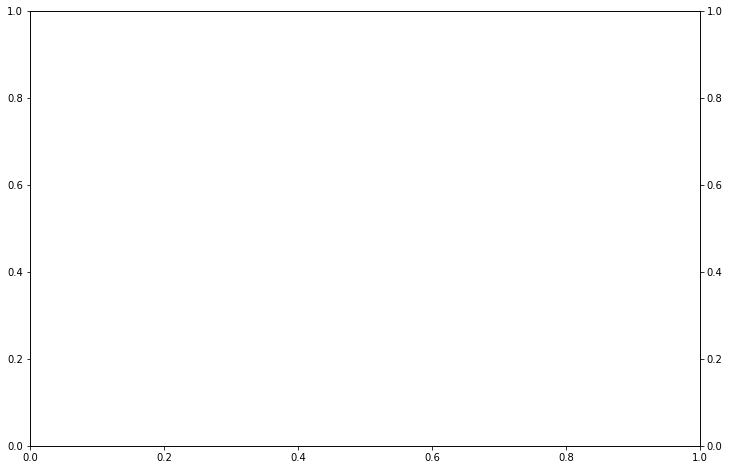

In [193]:
alphas = np.linspace(0, time_steps, time_steps)
fig, ax1 = plt.subplots(figsize=(12, 8))
ax2 = ax1.twinx()
ax2.plot(alphas, (listoftupleNG[1]), color="blue")
ax2.set_ylabel("gradients", color="blue", fontsize=14)
ax1.set_xlabel("alphas", fontsize=14)
#plt.title(f"Graph for {X.columns}", fontsize=14)

In [ ]:
test_data_reshaped = x_test_tfidf[1].reshape(1,time_steps,input_dimension)
#grads=get_gradients(test_data_reshaped, top_pred_idx=0)
igrads = get_integrated_gradients(test_data_reshaped, top_pred_idx=0, num_steps=50)
avg_grads = tf.reduce_mean(igrads, axis=0)
#sumigrad=[0]
#for igrad in igrads:
#    sumigrad=tf.add(sumigrad, igrad)



In [ ]:
alphas = np.linspace(0, time_steps, time_steps)
fig, ax1 = plt.subplots(figsize=(12, 8))
ax2 = ax1.twinx()
ax2.plot(alphas, (avg_grads), color="blue")
ax2.set_ylabel("gradients", color="blue", fontsize=14)
ax1.set_xlabel("alphas", fontsize=14)
#plt.title(f"Graph for {X.columns}", fontsize=14)

In [ ]:
alphas = np.linspace(0, 1, 50)
feat_n = 2  # age feature
fig, ax1 = plt.subplots(figsize=(12, 8))
ax2 = ax1.twinx()
ax2.plot(alphas, abs(igrads[:, feat_n]), color="blue")
ax2.set_ylabel("gradients", color="blue", fontsize=14)
ax2.set_ylim(-0.002, 0.1)
ax1.set_xlabel("alphas", fontsize=14)
plt.title(f"Graph for {X.columns[feat_n]}", fontsize=14)

In [ ]:
test_data_reshaped.shape

In [ ]:
test_data_reshaped[0].shape